# Random Forest

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
data1 = pd.read_csv("/Users/manancy/Downloads/Nancy 2/工作/Carlo /尝试的业务/RisklabDataCompetition/1 Credit Card Debt Crisis/2nd/OverSample/Cleaned data-Nancy(before sub-sample).csv")
dataN = pd.read_csv("/Users/manancy/Downloads/Nancy 2/工作/Carlo /尝试的业务/RisklabDataCompetition/1 Credit Card Debt Crisis/2nd/OverSample/Cleaned Sub-oversample-Nancy.csv")
# data1 is data cleaning's "data", dataN is "new_data"

In [2]:
data1

,Unnamed: 0,Credit_Limit,Sex,Education,Marital_Status,Age,Jan_Repay_Status,Previous_Payment_Prior_Jan,Jan_Statement,Feb_Repay_Status,...,Apr_Repay_Status,Previous_Payment_Prior_Apr,Apr_Statement,May_Repay_Status,Previous_Payment_Prior_May,May_Statement,Jun_Repay_Status,Previous_Payment_Prior_Jun,Jun_Statement,July_Payment_Status
0,0,9600.0,1.0,3.0,2.0,32.0,6.0,110.0,138.0,5.0,...,7.0,331.0,1080.0,12.0,535.0,1671.0,3.0,4800.0,6799.0,1.0
1,1,14400.0,2.0,3.0,2.0,30.0,-2.0,0.0,132.0,-2.0,...,-2.0,0.0,0.0,-2.0,45.0,0.0,-2.0,136.0,45.0,0.0
2,2,8100.0,1.0,1.0,2.0,29.0,-1.0,133.0,7.0,-1.0,...,-1.0,751.0,-4.0,-1.0,498.0,747.0,-1.0,381.0,496.0,0.0
3,3,2700.0,2.0,2.0,1.0,31.0,0.0,104.0,2891.0,0.0,...,0.0,40.0,2842.0,0.0,60.0,1187.0,0.0,19.0,1153.0,0.0
4,4,14500.0,2.0,2.0,1.0,37.0,-2.0,309.0,403.0,-2.0,...,-2.0,362.0,381.0,-2.0,0.0,362.0,-2.0,116.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30565,30565,1700.0,2.0,2.0,1.0,29.0,0.0,80.0,1598.0,0.0,...,0.0,56.0,1598.0,0.0,52.0,1556.0,0.0,80.0,1509.0,0.0
30566,30566,4700.0,1.0,1.0,2.0,33.0,2.0,80.0,2082.0,0.0,...,0.0,100.0,2194.0,0.0,100.0,2258.0,0.0,100.0,2321.0,1.0
30567,30567,6000.0,2.0,1.0,2.0,53.0,0.0,191.0,5418.0,0.0,...,0.0,165.0,5740.0,0.0,201.0,5842.0,0.0,140.0,5994.0,1.0
30568,30568,14500.0,2.0,3.0,2.0,46.0,-2.0,28.0,0.0,-2.0,...,-2.0,61.0,0.0,-2.0,0.0,61.0,-2.0,0.0,0.0,0.0


In [3]:
dataN

,Unnamed: 0,Credit_Limit,Sex,Education,Marital_Status,Age,Jan_Repay_Status,Previous_Payment_Prior_Jan,Jan_Statement,Feb_Repay_Status,...,Apr_Repay_Status,Previous_Payment_Prior_Apr,Apr_Statement,May_Repay_Status,Previous_Payment_Prior_May,May_Statement,Jun_Repay_Status,Previous_Payment_Prior_Jun,Jun_Statement,July_Payment_Status
0,0,9600.000000,1.000000,3.000000,2.000000,32.000000,6.000000,110.000000,138.000000,5.000000,...,7.000000,331.000000,1080.000000,12.000000,535.000000,1671.000000,3.000000,4800.000000,6799.000000,1.0
1,1,14400.000000,2.000000,3.000000,2.000000,30.000000,-2.000000,0.000000,132.000000,-2.000000,...,-2.000000,0.000000,0.000000,-2.000000,45.000000,0.000000,-2.000000,136.000000,45.000000,0.0
2,2,8100.000000,1.000000,1.000000,2.000000,29.000000,-1.000000,133.000000,7.000000,-1.000000,...,-1.000000,751.000000,-4.000000,-1.000000,498.000000,747.000000,-1.000000,381.000000,496.000000,0.0
3,3,2700.000000,2.000000,2.000000,1.000000,31.000000,0.000000,104.000000,2891.000000,0.000000,...,0.000000,40.000000,2842.000000,0.000000,60.000000,1187.000000,0.000000,19.000000,1153.000000,0.0
4,4,14500.000000,2.000000,2.000000,1.000000,37.000000,-2.000000,309.000000,403.000000,-2.000000,...,-2.000000,362.000000,381.000000,-2.000000,0.000000,362.000000,-2.000000,116.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47379,47379,1900.000000,1.000000,2.345627,1.345627,57.889360,1.654373,10.469973,10.469973,-1.345627,...,-1.345627,10.469973,10.469973,-1.345627,10.469973,10.469973,-1.345627,10.469973,10.469973,1.0
47380,47380,1100.000000,1.894277,2.000000,2.000000,23.000000,1.894277,61.462637,497.325916,2.000000,...,1.788553,0.000000,610.546109,2.000000,58.537363,588.546109,2.000000,0.000000,637.237684,1.0
47381,47381,2000.000000,1.132684,2.132684,1.000000,36.540480,0.265367,81.724887,1924.543473,0.265367,...,0.000000,41.194152,1970.071215,0.000000,75.886808,1060.472258,0.000000,74.692656,1119.899547,1.0
47382,47382,4000.000000,1.349317,2.301366,1.349317,38.109561,-0.301366,0.000000,20.171170,-1.349317,...,-1.349317,10.410926,10.410926,-1.349317,14.253415,10.410926,-1.000000,10.410926,14.253415,1.0


In [4]:
# Original
X=data1.drop(columns="July_Payment_Status")
y=data1["July_Payment_Status"]
# Sub-sample
Xn=dataN.drop(columns="July_Payment_Status")
yn=dataN["July_Payment_Status"]

In [5]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3, random_state=30)# Original

XtrainN, XtestN, YtrainN, YtestN = train_test_split(Xn, yn, test_size=0.3, random_state=30)# sub-sample

In [6]:
#Original
rfc = RandomForestClassifier(n_estimators= 91,random_state=30)
rfc = rfc.fit(Xtrain,Ytrain)
y_pred=rfc.predict(Xtest)
score_r = rfc.score(Xtest,Ytest)

print("Original data:",score_r)

#Sub-sample
rfcN = RandomForestClassifier(n_estimators= 91,random_state=30)
rfcN = rfc.fit(XtrainN,YtrainN)
yn_pred=rfc.predict(XtestN)
score_rN = rfc.score(XtestN,YtestN)

print("Sub-sample data:",score_rN)

Original data: 0.8077636026605605
Sub-sample data: 0.8767585818795723


In [14]:
#Original
from sklearn.model_selection import GridSearchCV         #time warning
parameter = {"n_estimators":range(1,101,10)}
rfc1 = RandomForestClassifier(random_state=30)  
GS = GridSearchCV(rfc, param_grid=parameter, cv=10)
GS.fit(Xtrain,Ytrain)

print(GS.best_params_)
print(GS.best_score_)

{'n_estimators': 91}
0.8129352959938482


In [8]:
# Sub-sample
parameter = {"n_estimators":range(1,101,10)}
rfcN = RandomForestClassifier(random_state=30)  
GS = GridSearchCV(rfc, param_grid=parameter, cv=10)
GS.fit(XtrainN,YtrainN)

print(GS.best_params_)
print(GS.best_score_)

{'n_estimators': 81}
0.8808188561829926


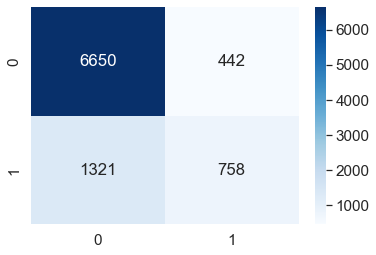

In [16]:
#Original
cm = confusion_matrix(Ytest, y_pred)
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt="d",cmap = "Blues")
plt.show()

In [17]:
print(classification_report(Ytest, y_pred, digits=6)) # Original

              precision    recall  f1-score   support

         0.0   0.834274  0.937676  0.882958      7092
         1.0   0.631667  0.364598  0.462336      2079

    accuracy                       0.807764      9171
   macro avg   0.732970  0.651137  0.672647      9171
weighted avg   0.788345  0.807764  0.787606      9171



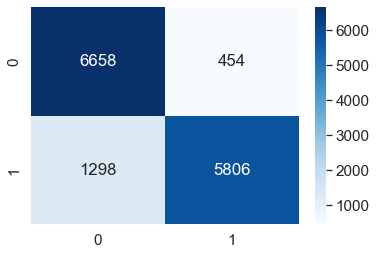

In [11]:
#Sub-sample
cmN = confusion_matrix(YtestN, yn_pred)
sns.set(font_scale=1.4)
sns.heatmap(cmN, annot=True, fmt="d",cmap = "Blues")
plt.show()

In [12]:
print(classification_report(YtestN, yn_pred, digits=6)) # Sub-sample

              precision    recall  f1-score   support

         0.0   0.836853  0.936164  0.883727      7112
         1.0   0.927476  0.817286  0.868902      7104

    accuracy                       0.876759     14216
   macro avg   0.882164  0.876725  0.876314     14216
weighted avg   0.882139  0.876759  0.876318     14216

